## LOADING LIBRARY

In [1]:
import cv2 #opencv libaray
import os #os for getting data and path of local machine
import re #regular expression libarary
import numpy as np #nump for numerical operations
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import imutils
from skimage.metrics import structural_similarity


## CONVERT VIDEO DATA INTO FRAMES

as we know our video is made from lot of the frames by combining all that frames we form a video here we reverse that
we convert our video into frames as taking snapshot of the video by using open-cv libaray 

In [2]:
import cv2
import os
vidcap = cv2.VideoCapture('C:\\Users\\Shubham\\Desktop\\MARJ INTERN TASK\\video.mp4')
path = 'C:\\Users\\Shubham\\Desktop\\MARJ INTERN TASK\\simple model\\frames'
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        #cv2.imwrite("image"+str(count)+".jpg", image)
        cv2.imwrite(os.path.join(path , str(count)+'.jpg'), image)
        # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 1 #//it will capture image in each 1 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

## read the frames with help of open-cv

after converting all the frames here we read the frames with help of the open-cv

In [3]:
col_frames = os.listdir('frames/')

# sort file names
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# empty list to store the frames
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('frames/'+i)
    # append the frames to the list
    col_images.append(img)

here we take one of the frames as threshold image here we compare all the images with this threshold

In [4]:
good=cv2.imread('C:\\Users\\Shubham\\Desktop\\MARJ INTERN TASK\\simple model\\frames\\57.jpg')

In [9]:
cv2.imshow('window', good)
cv2.waitKey(0)
cv2.destroyAllwindows()

AttributeError: module 'cv2.cv2' has no attribute 'destroyAllwindows'

here we use structural_similarity logic between good images and all other images if our score>=40% means our brick is 40% 
similar to original image so we will can assign use the label as undefectecd otherwise we will map as defected

In [11]:
pathIn = "contour/" # to store all the contours updated images

for i in range(len(col_images)-1):
    frame1=col_images[i]
    frame2=col_images[i+1]
    diff=cv2.absdiff(frame1, frame2)
    imageA=cv2.resize(frame1, (700, 700),interpolation=cv2.INTER_LINEAR)
    imageB=cv2.resize(good, (700, 700),interpolation=cv2.INTER_LINEAR)
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    #image structural similarity matching
    score,diff1=structural_similarity(grayA,grayB, full=True)
    print(score)
    diff1=(diff1*255).astype("uint8")
    thresh=cv2.threshold(diff1, 0, 255, cv2.THRESH_BINARY_INV| cv2.THRESH_OTSU)[1]
    cnts=cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts=imutils.grab_contours(cnts)
    imageA=col_images[i].copy()
    #draw contour in defected region 
    for c in cnts:
        x,y,w,h=cv2.boundingRect(c)
        cv2.rectangle(imageA,(x,y),(x+w, y+h),(0,0,255),2)
    
    gray=cv2.cvtColor(diff,cv2.COLOR_BGR2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    _,thresh=cv2.threshold(blur,20,255,cv2.THRESH_BINARY)
    dilated=cv2.dilate(thresh, None,iterations=3)
    contours,_=cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #draw contour in object region
    for contour in contours:
        (x,y,w,h)=cv2.boundingRect(contour)
        if cv2.contourArea(contour)<900:
            continue
        cv2.rectangle(imageA,(x,y),(x+w,y+h),(0,255,0),5)
    if score>0.4:
        #cv2.rectangle(imageA,(50,900),(900,0),(255,255,0),5)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(imageA, 'non-defective', (50,100), font, 2, (255, 0, 0), 2)
        cv2.imwrite(pathIn+str(i)+'.png',imageA)  
    elif score<=0.4:
        #cv2.rectangle(imageA,(50,900),(900,0),(255,255,0),5)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(imageA, 'defective', (50,100), font, 2, (0, 0, 255), 2)
        cv2.imwrite(pathIn+str(i)+'.png',imageA)
    

0.3424583975298902
0.327245828931396
0.3683376726885241
0.38002686474786296
0.44009958218226947
0.3866101394894139
0.35148049878661247
0.39835311442670474
0.41329961302025064
0.3219222248730295
0.44889838244135355
0.428116929991896
0.43479163763414913
0.38509387244533344
0.3487788976649927
0.4705015729980751
0.430060959772799
0.4166725854859029
0.4744665079671494
0.42481834006463515
0.3716253460144837
0.423433752926576
0.46841092509913346
0.3560477136132363
0.3787170341162932
0.40375123856003775
0.4032762930165783
0.4612178246366443
0.3910288131202499
0.43944444306975017
0.399030874638346
0.4456074100199932
0.39802173789081313
0.40495519426769955
0.4233627920040304
0.39638335290176485
0.4442245968582745
0.3774054891851232
0.46232497843488785
0.38162207065346404
0.4132494572340962
0.3960229959807336
0.4462994016083182
0.3948186040124092
0.4120155847527254
0.3669752073847736
0.3585460648461862
0.4146776364734078
0.3506424946055496
0.4374298733139197
0.40068237609927776
0.4214913473755708

## now merge all the frames to form video

In [33]:
# specify video name
pathOut = 'update_video1.mp4'

# specify frames per second
fps = 2.0

In [34]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

In [35]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))

for i in range(len(files)):
    filename=pathIn + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

In [36]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()

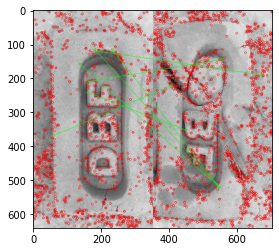

(<matplotlib.image.AxesImage at 0x21867133748>, None)

In [18]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('C:\\Users\\Shubham\\Desktop\\MARJ INTERN TASK\\optical flow and houdsroff approch\\frames\\57.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('C:\\Users\\Shubham\\Desktop\\MARJ INTERN TASK\\optical flow and houdsroff approch\\frames\\1.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

In [10]:
random_image=cv2.imread('C:\\Users\\Shubham\\Desktop\\MARJ INTERN TASK\\simple model\\frames\\49.jpg')